# AI for Trading | Module 7 | L17: Model Testing and Evaluation

## 1. Intro
- https://youtu.be/4C4PuJANIdE
- How well is my model doing?
- How do we improve the model based on its metrics?


## 2. Outline
- https://youtu.be/mIgABrjJVBY
- 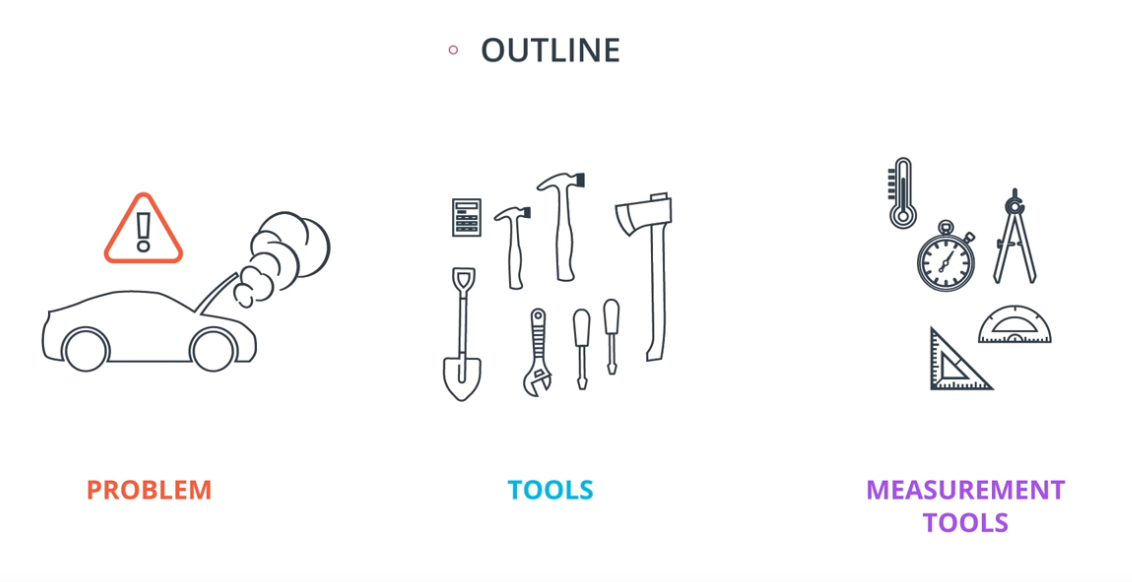
- We'll be learning the Measurement Tools


## 3. Testing your models
- https://youtu.be/gmxGRJSKEb0
- Regression and Classification
- Regression: Predicts a value
- Classification: Aims to determine a state
  - + or - value as shown in the following
- 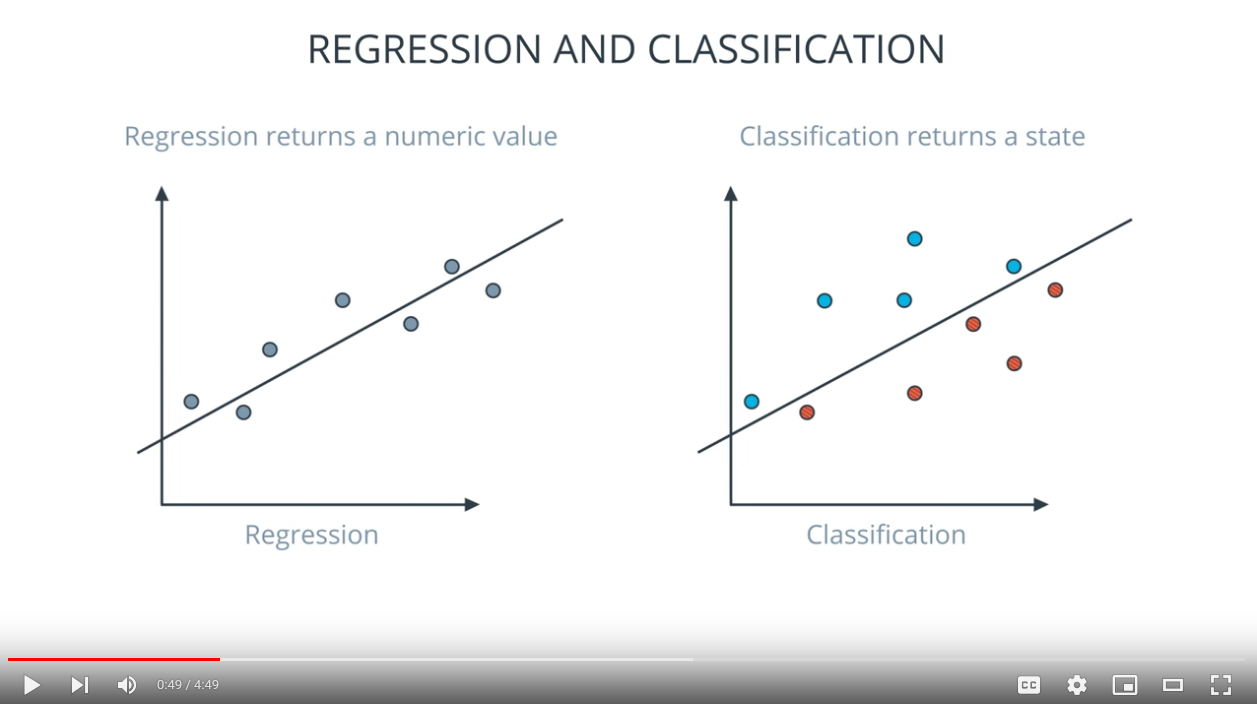
- How do we find a model that generalizes well?
- Training set and Testing set
  - 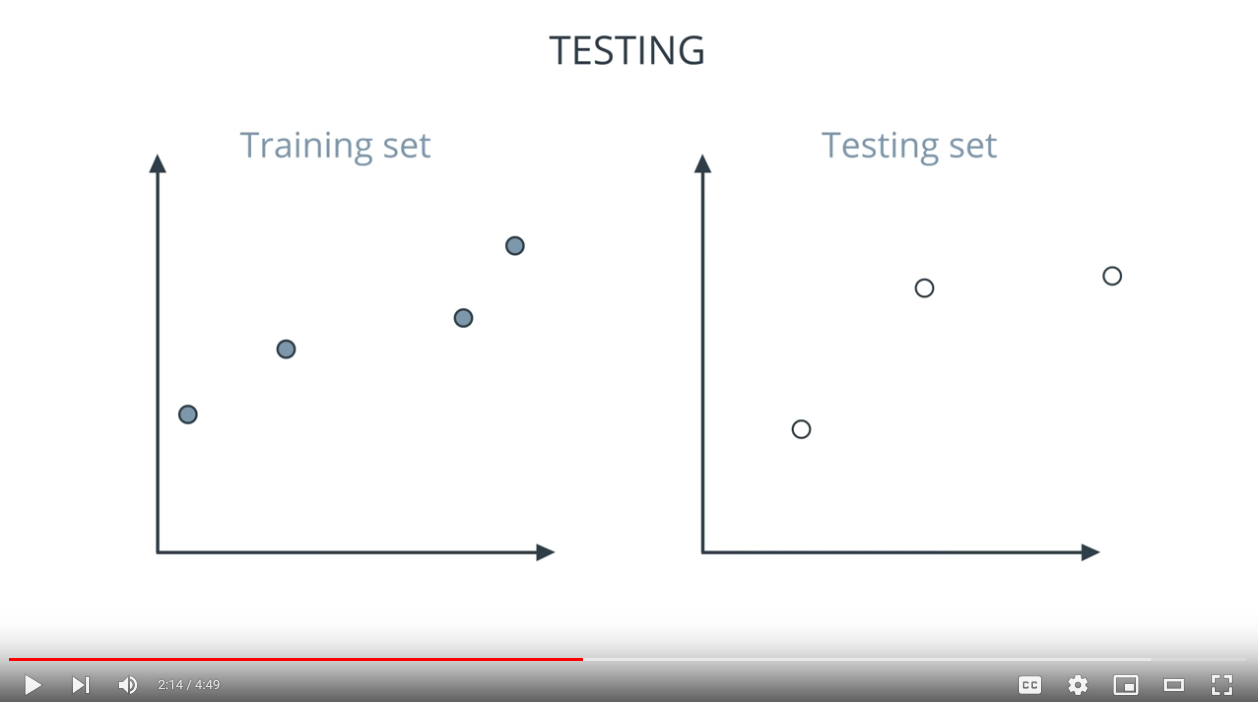
- 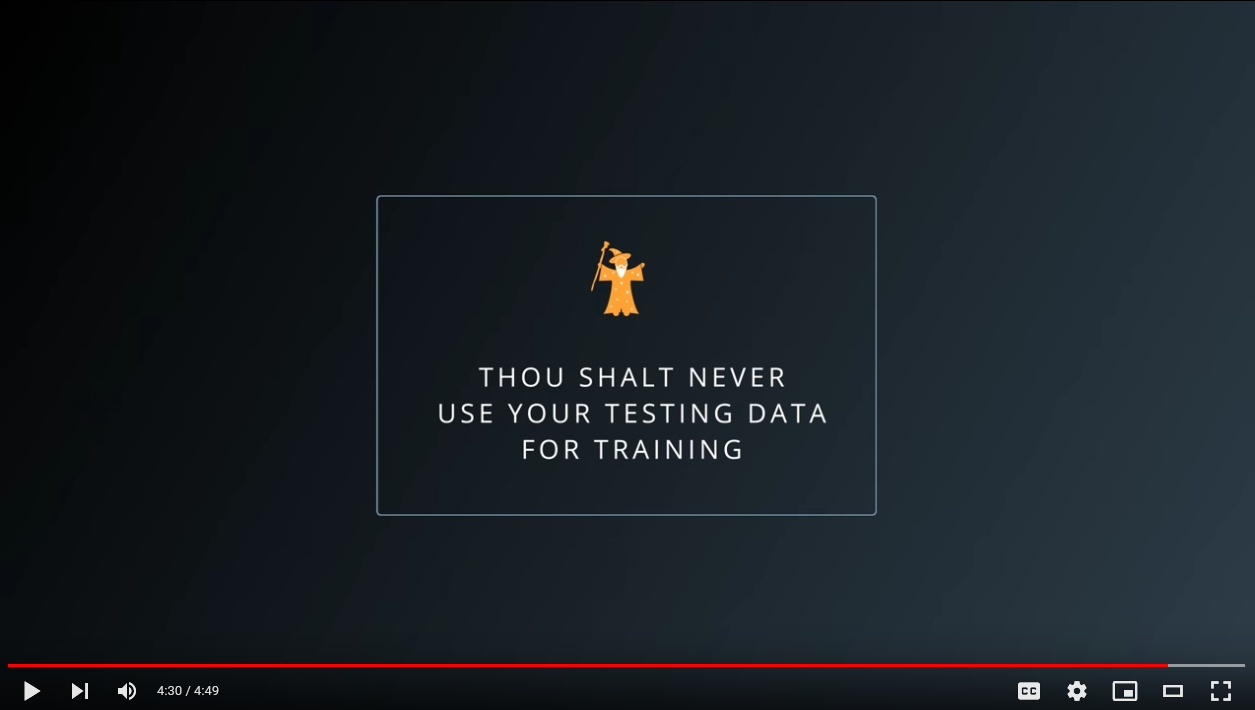
  - Thou shalt never use your testing data for training


In [ ]:
## 3. Testing your models
# Import statements 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Import the train test split
# http://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html
from sklearn.cross_validation import train_test_split


# Read in the data.
data = np.asarray(pd.read_csv('data/c2-m7-l17-model-testing-and-evaluation.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

# Use train test split to split your data 
# Use a test size of 25% and a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Instantiate your decision tree model
model = DecisionTreeClassifier()

# TODO: Fit the model to the training data.
model.fit(X_train, y_train)

# TODO: Make predictions on the test data
y_pred = model.predict(X_test)

# TODO: Calculate the accuracy and assign it to the variable acc on the test data.
acc = accuracy_score(y_test, y_pred)

## 4. Confusion Matrix
- https://youtu.be/9GLNjmMUB_4
- 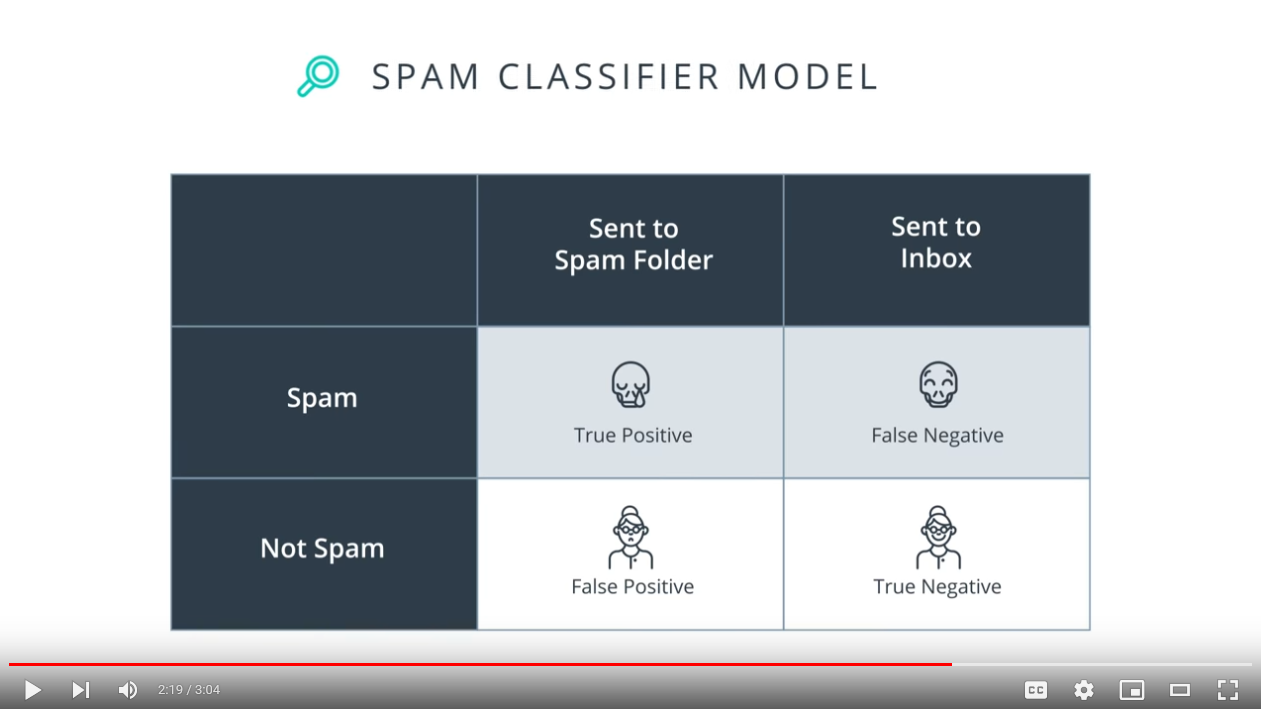

### Quiz: Confusion Matrix
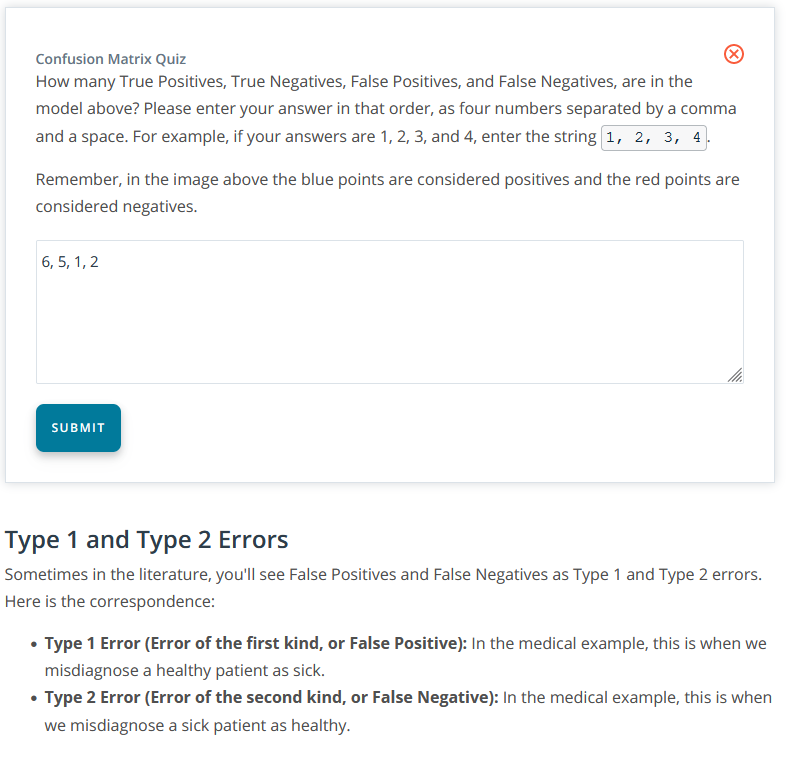

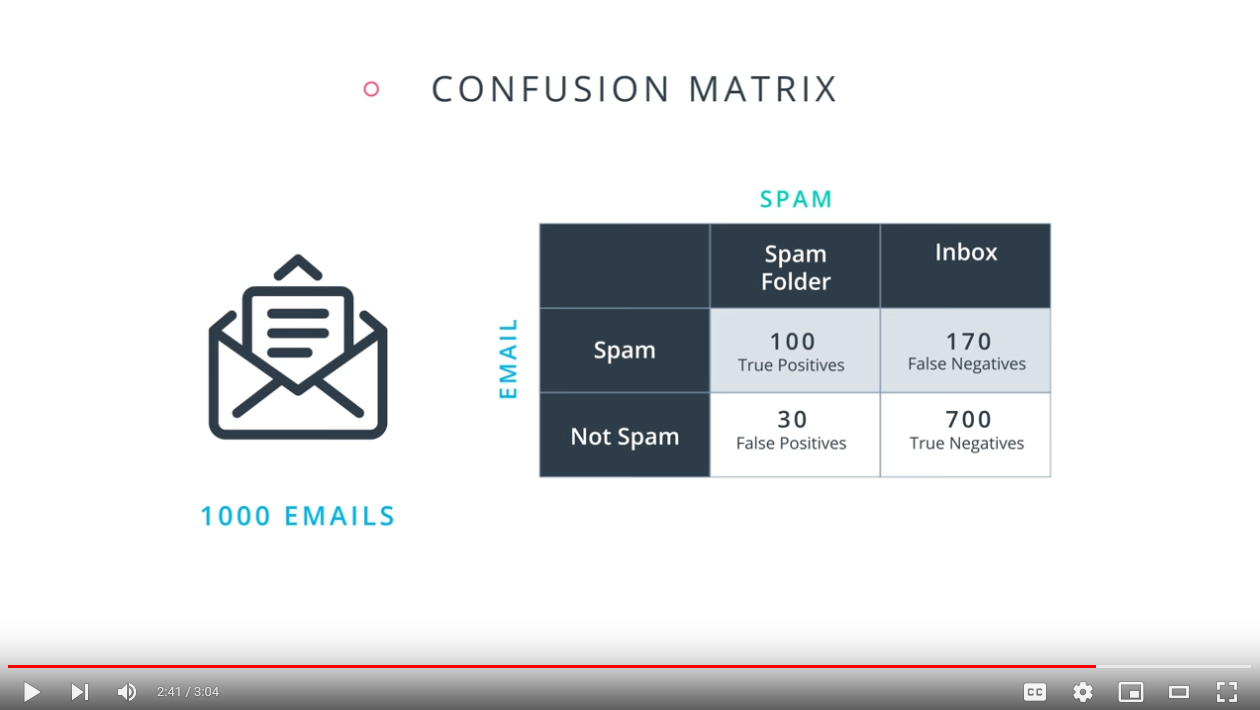
- True Positives, True Negatives, False Positives, and False Negatives
- 6, 5, 2, 1


## 5. Confusion Matrix 2
This section explains the solution: 6, 5, 1, 2
- https://youtu.be/ywwSzyU9rYs
- 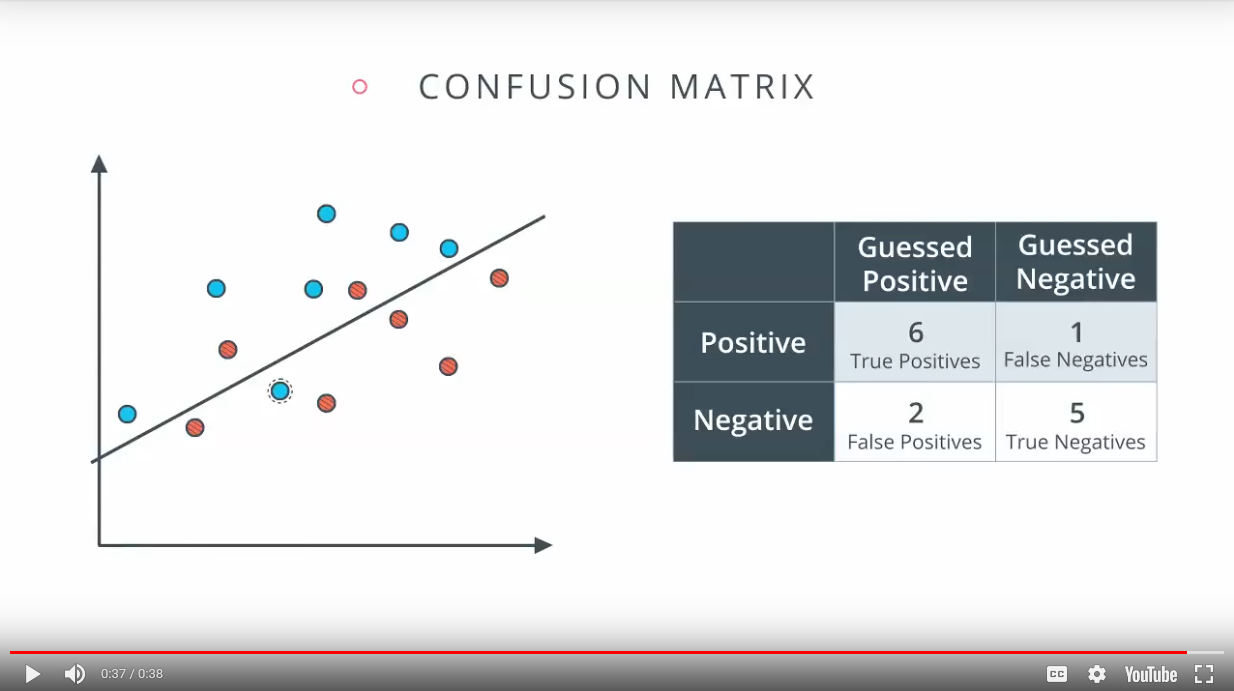


## 6. Accuracy
- https://youtu.be/s6SfhPTNOHA
- 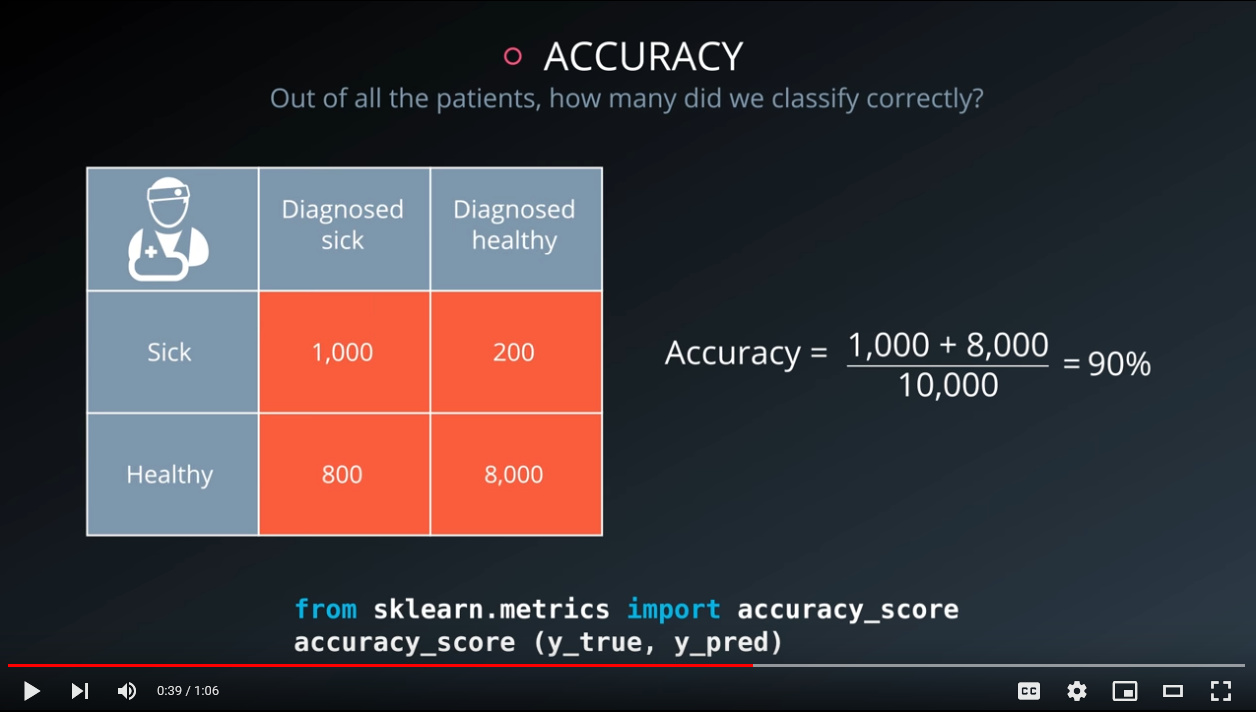
- 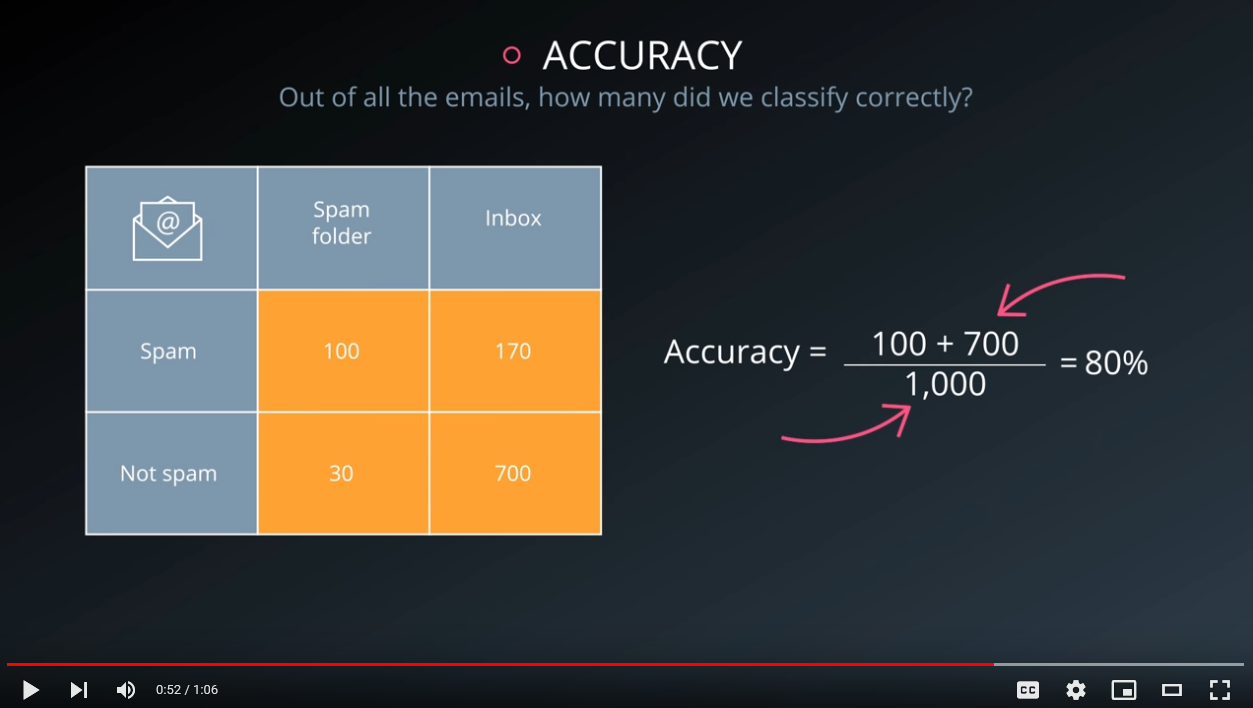

### Quiz
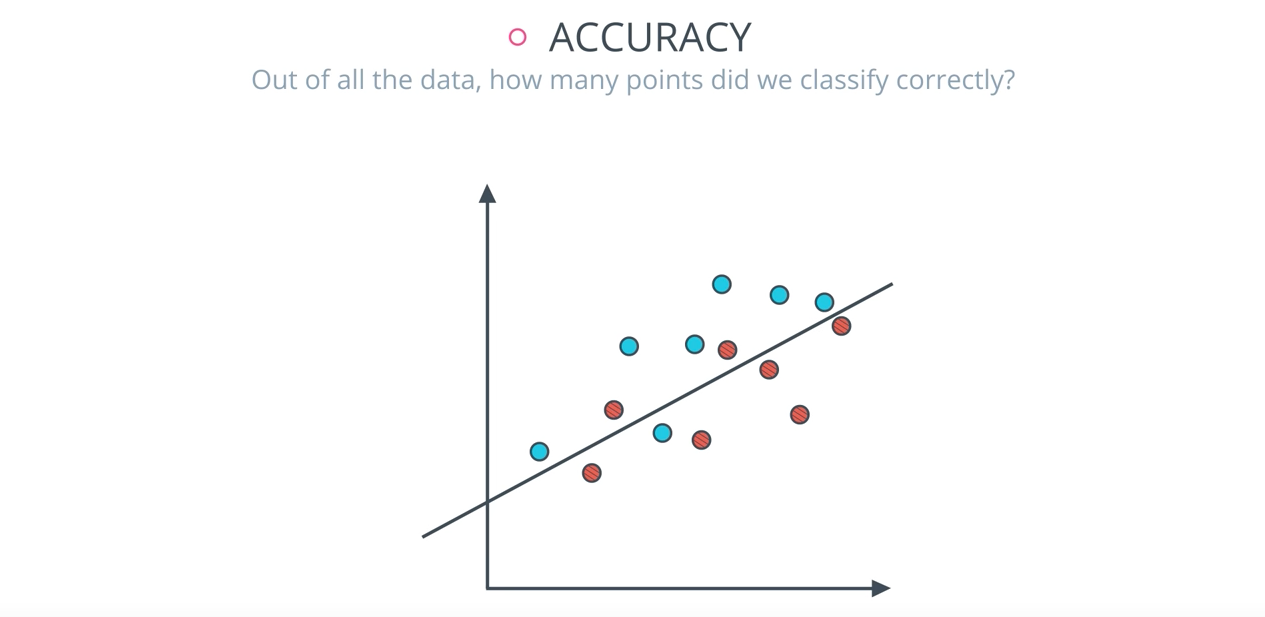

See next cell for calculations.


## 7. Accuracy 2
- https://youtu.be/ueYCLfd_aNQ

In [5]:
#### 6. Accuracy | Quiz Calculations
true_positives = 6
true_negatives = 5
false_positives = 1
false_negatives = 2
total = true_positives + true_negatives + false_positives + false_negatives

print(((true_positives + true_negatives) / (total)) * 100)


78.57142857142857


## 8. When accuracy won't work
- https://youtu.be/r0-O-gIDXZ0
- The denominator for accuracy in the video should actually be 284,807 instead of 284,887.


## 9. False Negatives and Positives
- https://youtu.be/_ytP9zIkziw

### Quiz 1: The Medical Model
- 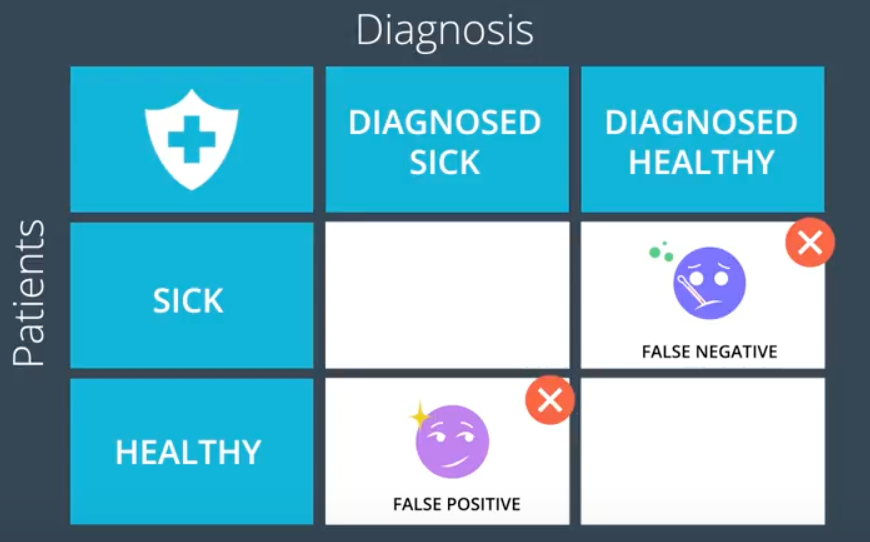

Medical
- 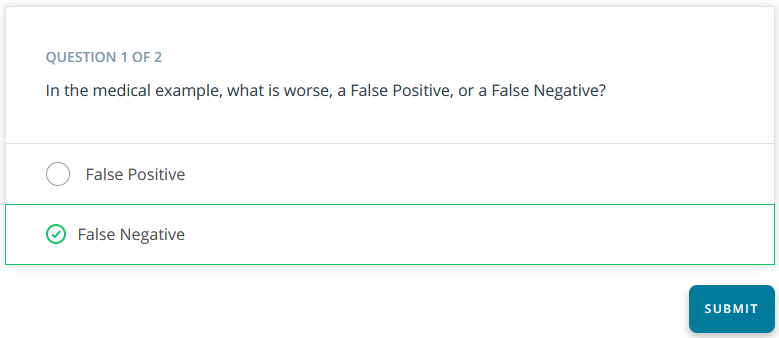
- Correct! A False Positive implies sending a healthy person to get more tests. This is slightly inconvenient, but ok. A False Negative implies sending a sick person home, which can be disastrous!

Spam
- 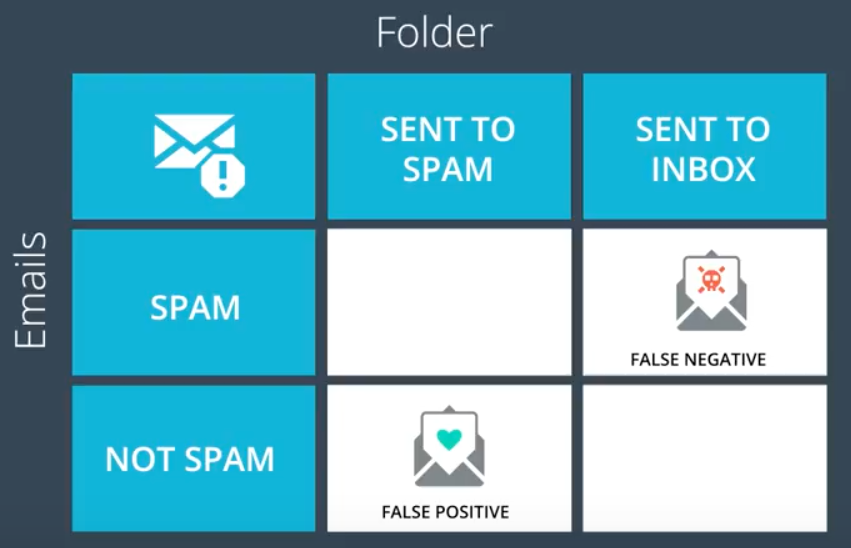
- 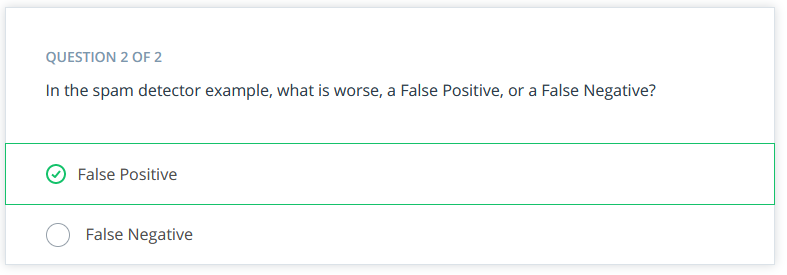
- Correct! A False Negative implies a spam message will make its way into your inbox. This is slightly inconvenient, but ok. A False Positive implies missing an e-mail from your dear grandma, which can be disastrous!


## 10. Precision and Recall
- https://youtu.be/KOytJL1lvgg
- 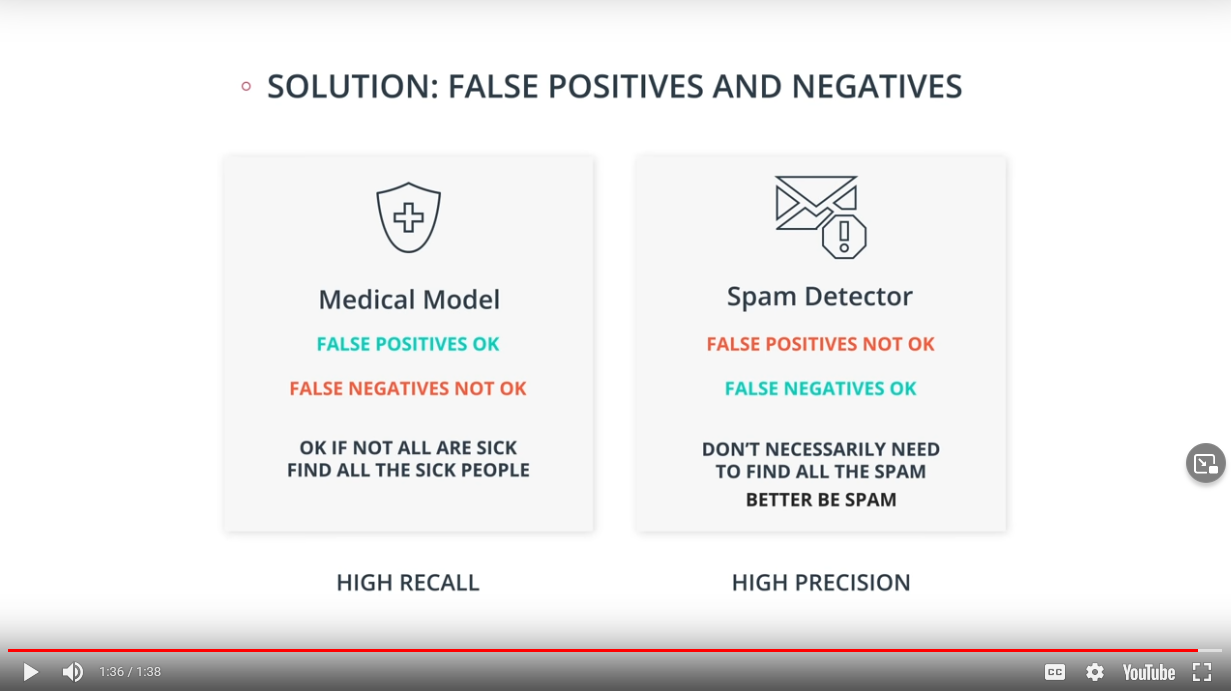
- Corrections: At 0:11, "false negative" and "false positive" are swapped. In this case, a false negative is much worse than a false positive, since predicting that a sick person is healthy is much more dangerous than predicting that a healthy person is sick.

## 11. Precision
- https://youtu.be/q2wVorBfefU

### Quiz
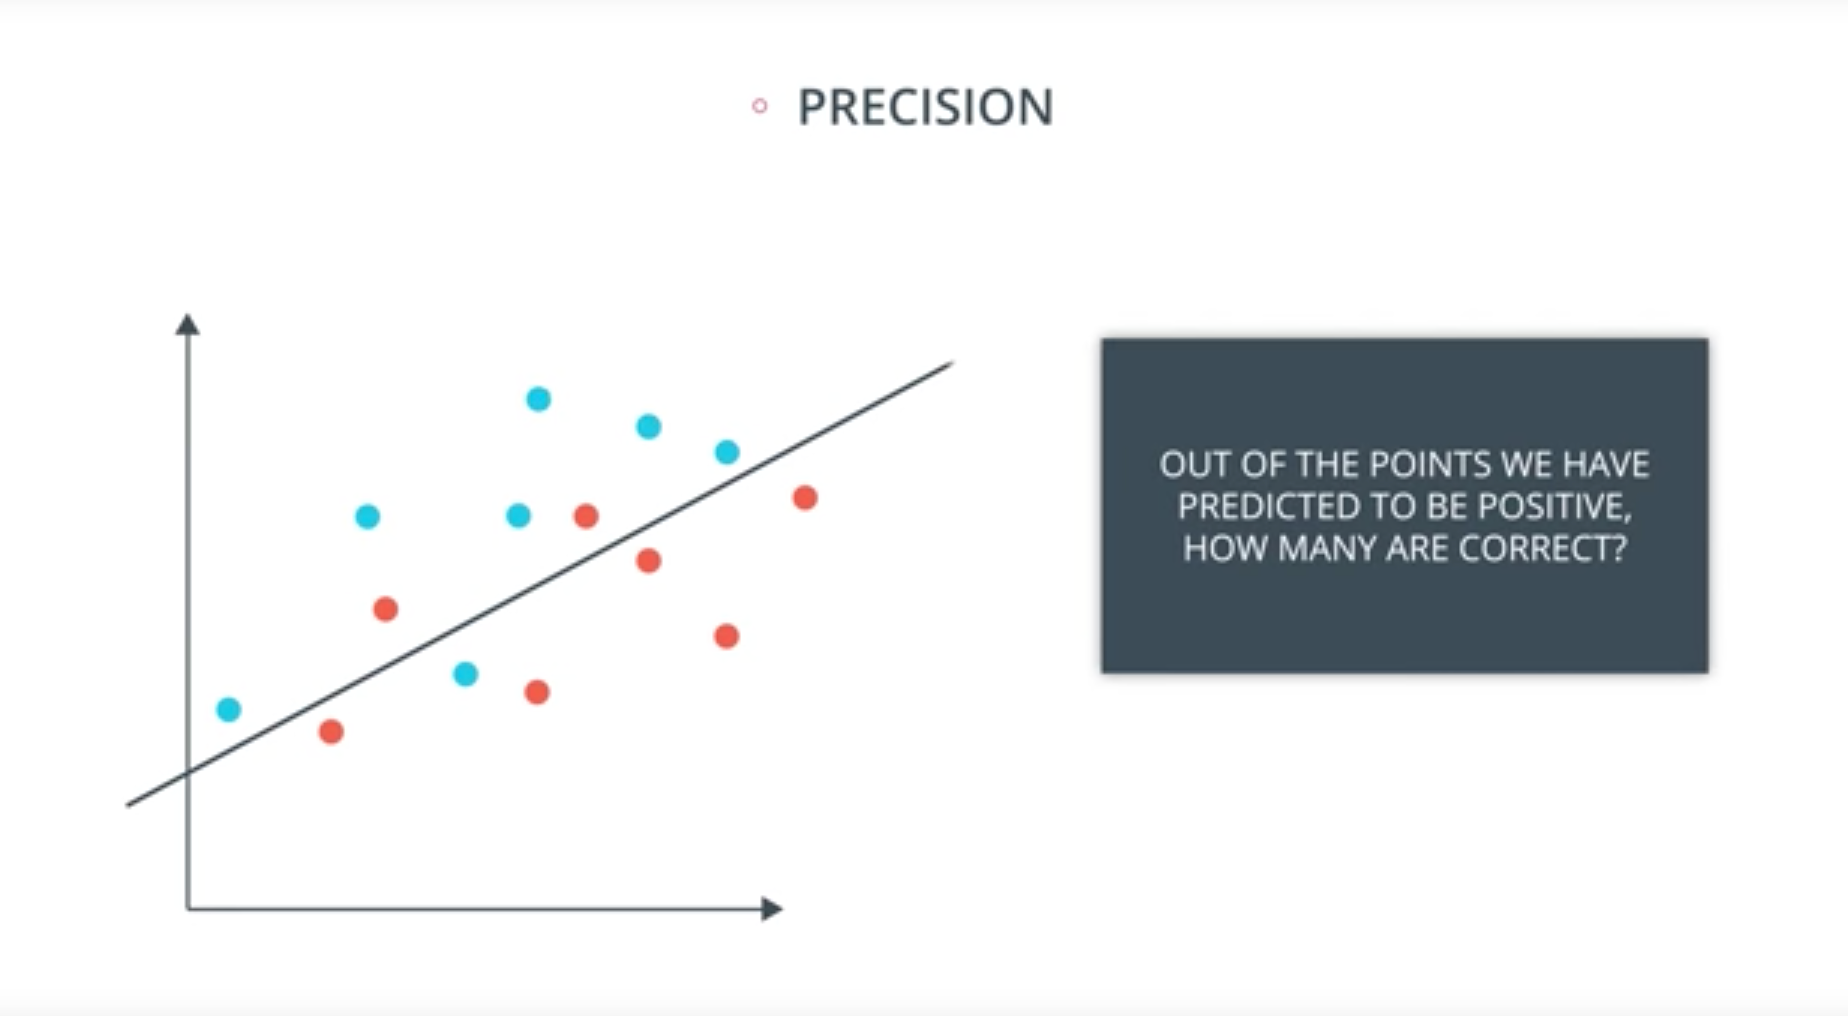
In this image, the blue points are labelled positive, and the red points are labelled negative. Furthermore, the points on top of the line are predicted to be positive, and the points below the line are predicted to be negative.
- 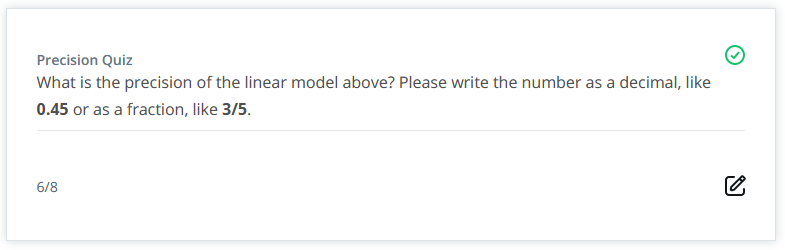
- 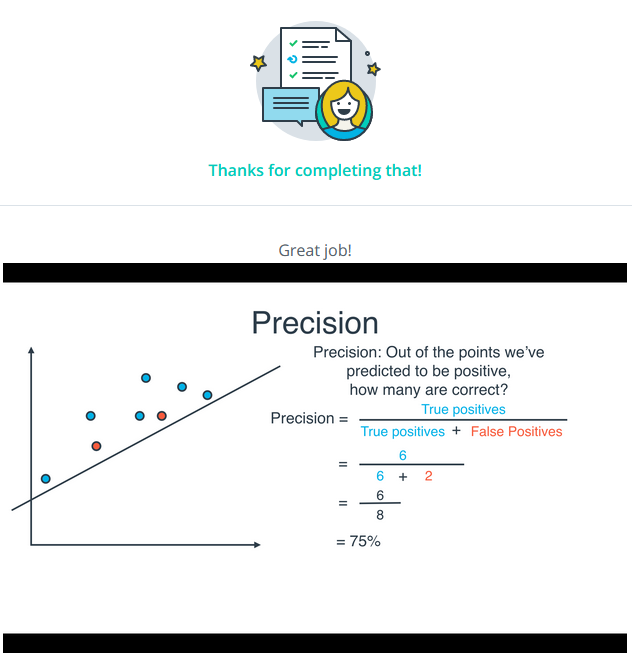

In [7]:
#### 11. Precision | Quiz
true_positives = 6
true_negatives = 5
false_positives = 1
false_negatives = 2
total = true_positives + true_negatives + false_positives + false_negatives

#print(((true_positives + true_negatives) / (total)) * 100)
print(total)

14


## 12. Recall
- https://youtu.be/0n5wUZiefkQ
- 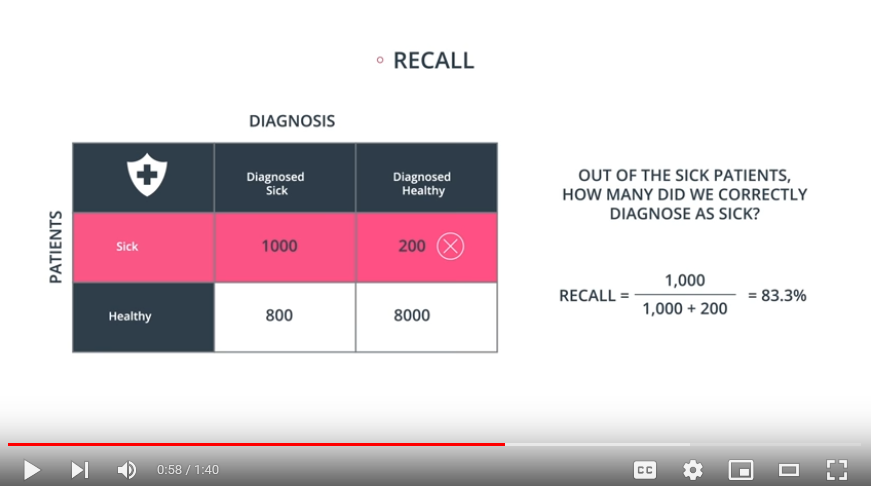
- 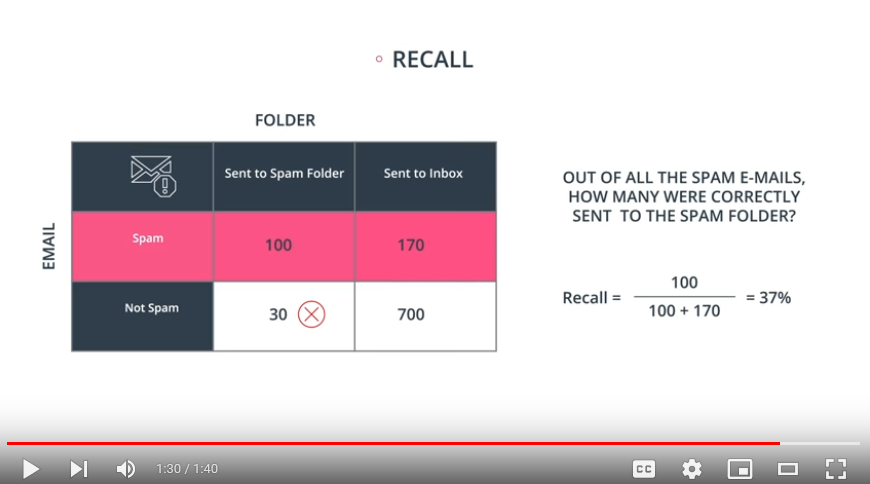

### Quiz
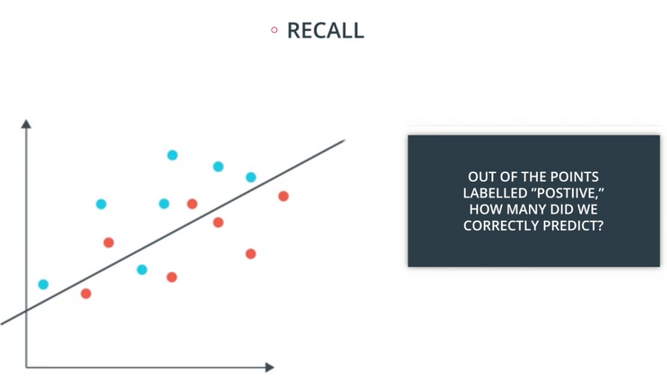
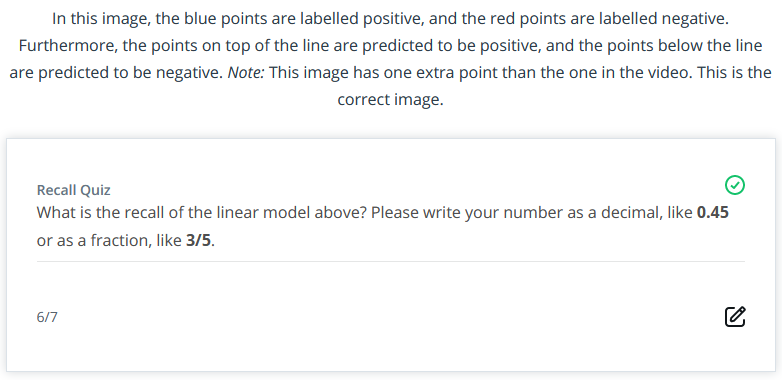
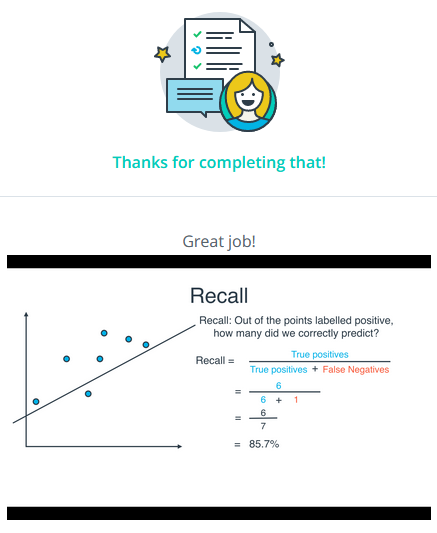


## 13. Types of Errors
- https://youtu.be/Twf1qnPZeSY
- 4:01 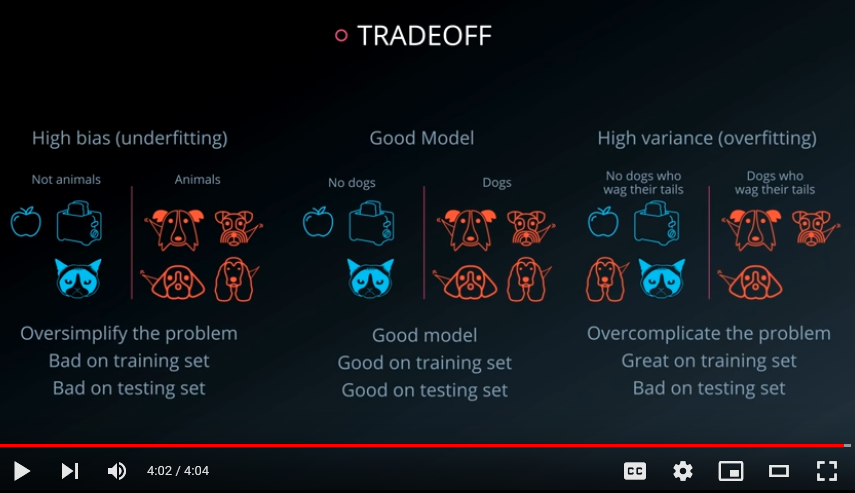


## 14. Model Complexity Graph
- https://youtu.be/YS5OQCA5cLY
- 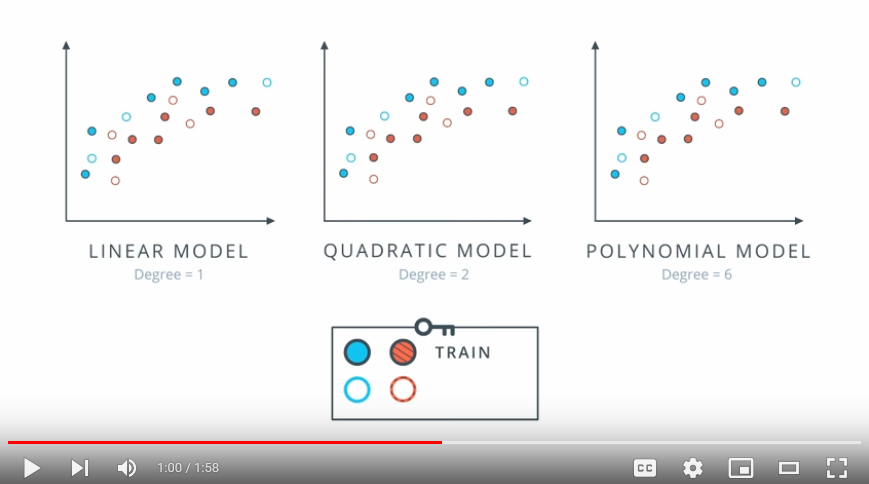

### Quiz
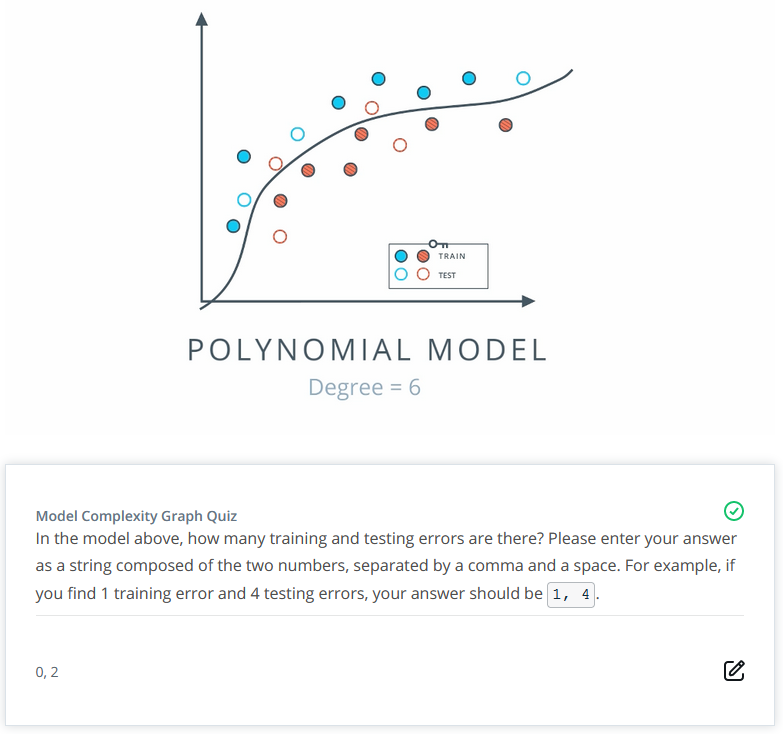
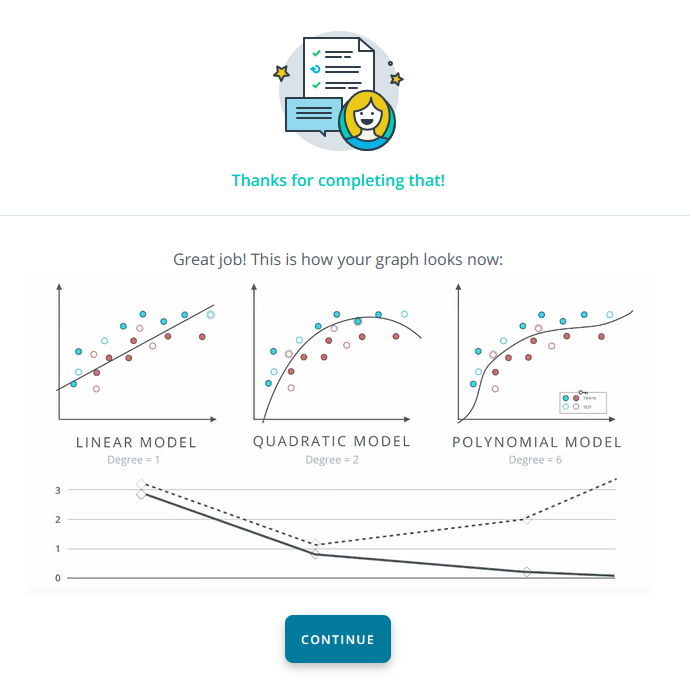


## 15. Cross Validation
- https://youtu.be/5pWHGkNyRhA
- 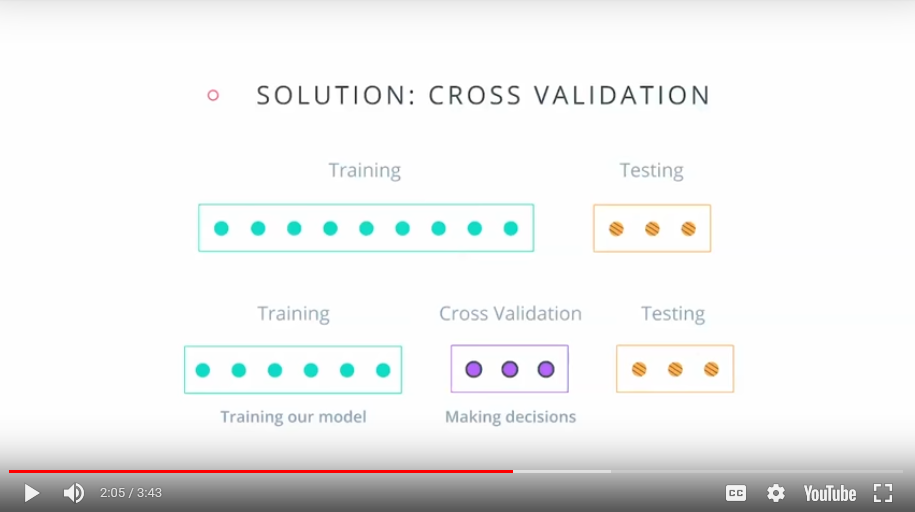


## 16. K-Fold Cross Validation
- https://youtu.be/9W6o6eWGi-0


## 17. Cross Validation for Time Series
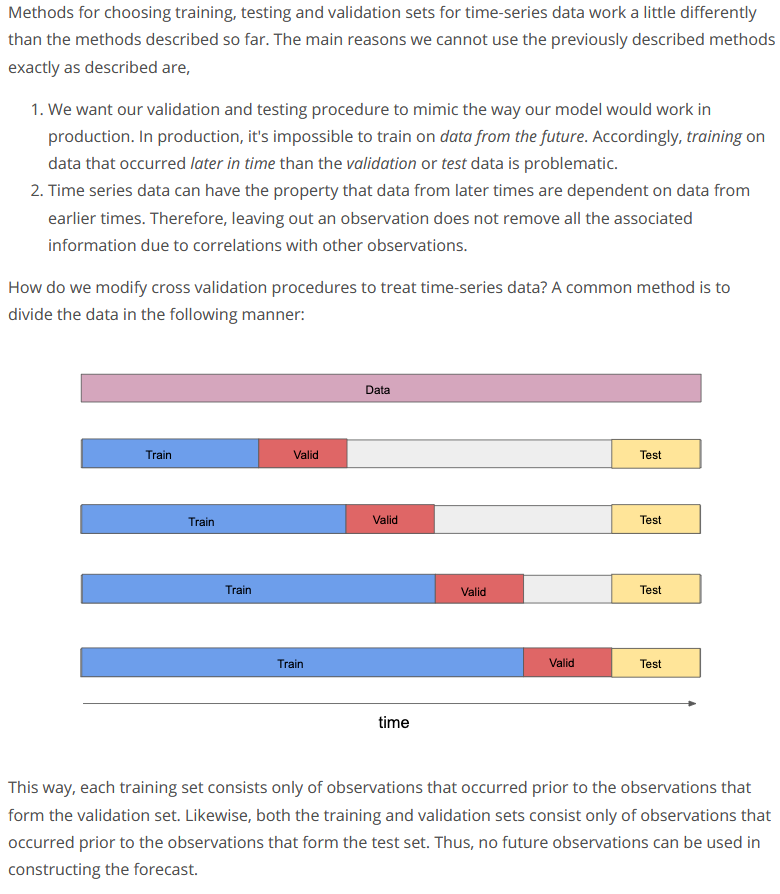


## 18. Validation for Financial Data
Furthermore, when working with financial data, we can bring practitioners' knowledge of markets and financial data to bear on our validation procedures. We know that since markets are competitive, factors decay over time; signals that may have worked well in the past may no longer work well by the current time. For this reason, we should generally test and validate on the most recent data possible, as testing on the recent past could be considered the most demanding test.

It's possible that the design of the model may cause it to perform better or worse in different market regimes; so the most recent time period may not be in a market regime in which the model would perform well. But generally, we still prefer to use most recent data to test if the model would work in the time most similar to the present. In practice, of course, before investing a lot of money in a strategy, we would allow time to elapse without changing the model, and test its performance with this true out-of-sample data: what's known as "paper trading".

In summary, most common practice is to **keep a block of data from the most recent time period as your *test* set**.

Then, the data are split into train, valid and test sets according to the following schematic:

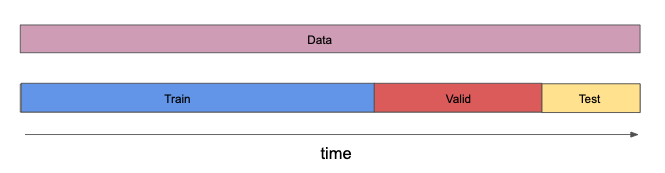

When working with data that are indexed by asset and day, it's important not to split data for the same day, but for different assets, among sets. This would manifest as a subtle form of lookahead bias. For example, say data from Coca-Cola and Pepsi for the same day ended up in different sets. Since they are very similar companies, one might expect their share price trends to be correlated. If the model were trained on data from one company, and then validated on data from the other company, it might "learn" about a price movement that affects both companies, and therefore have artificially inflated performance on the validation set.


## 19. Learning Curves
- https://youtu.be/ZNhnNVKl8NM
  - Correction: In the first plots, the horizontal axis is labeled "Degree", and it should labeled "Number of Training Points". At 4:10: The graph represents High Variance to the left side of the video instead of High Bias
- 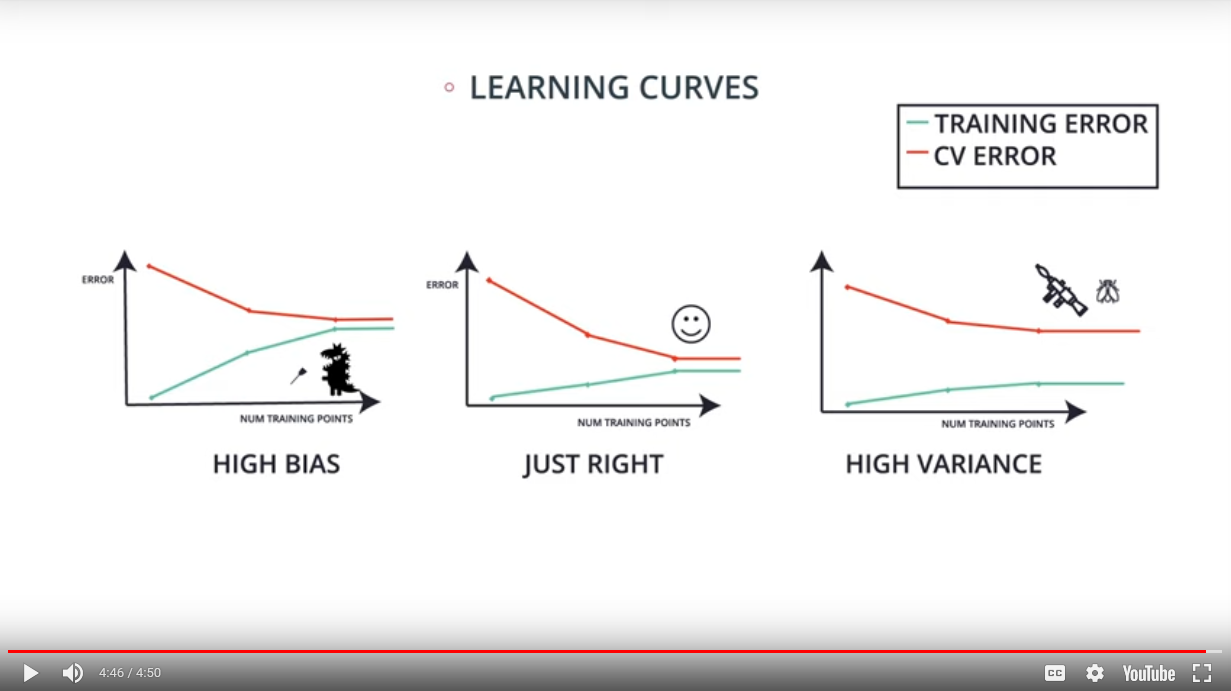


## 20. Detecting Overfitting and Underfitting with Learning Curves
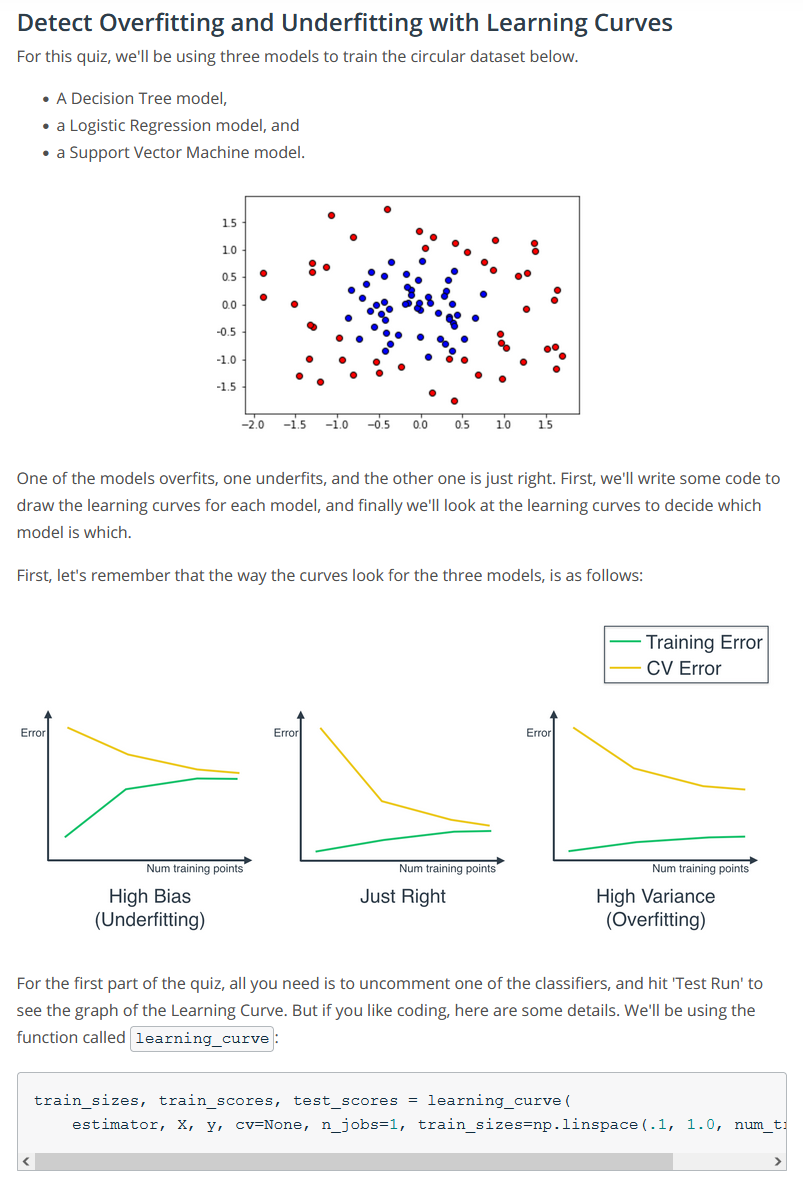
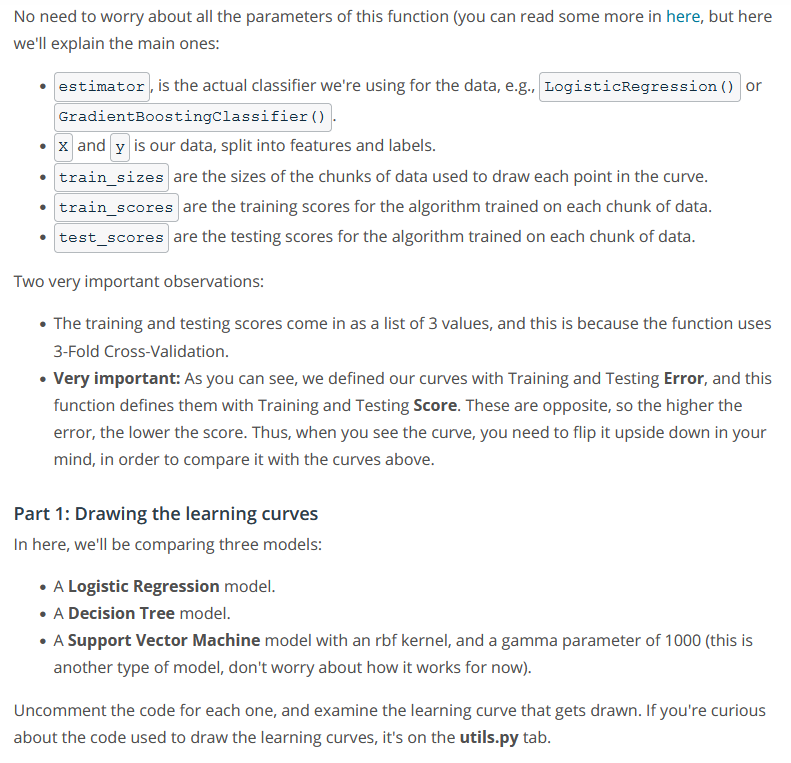

### Part 2: Analyzing the learning curves
For this second part of the quiz, you can look at the curves you've drawn before, to decide which one of the three models underfits, which one overfits, and which one is just right.

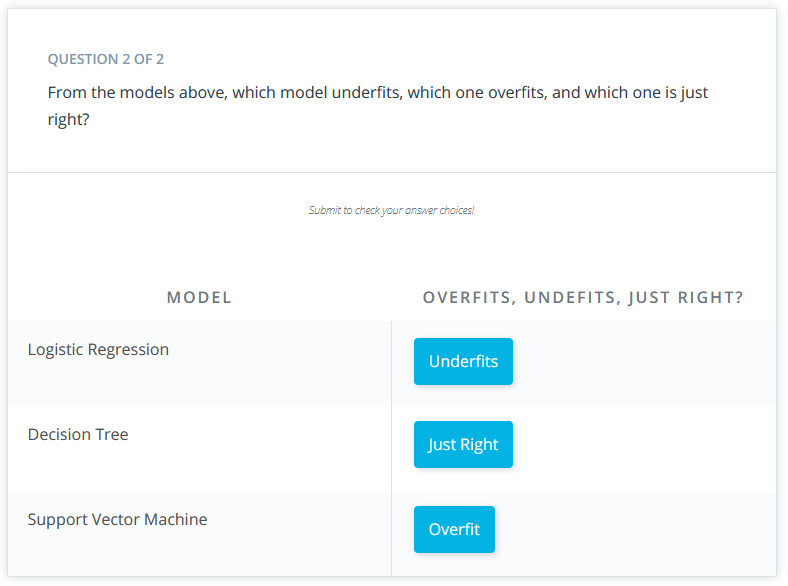


## 21. Solution: Detecting Overfitting and Underfitting
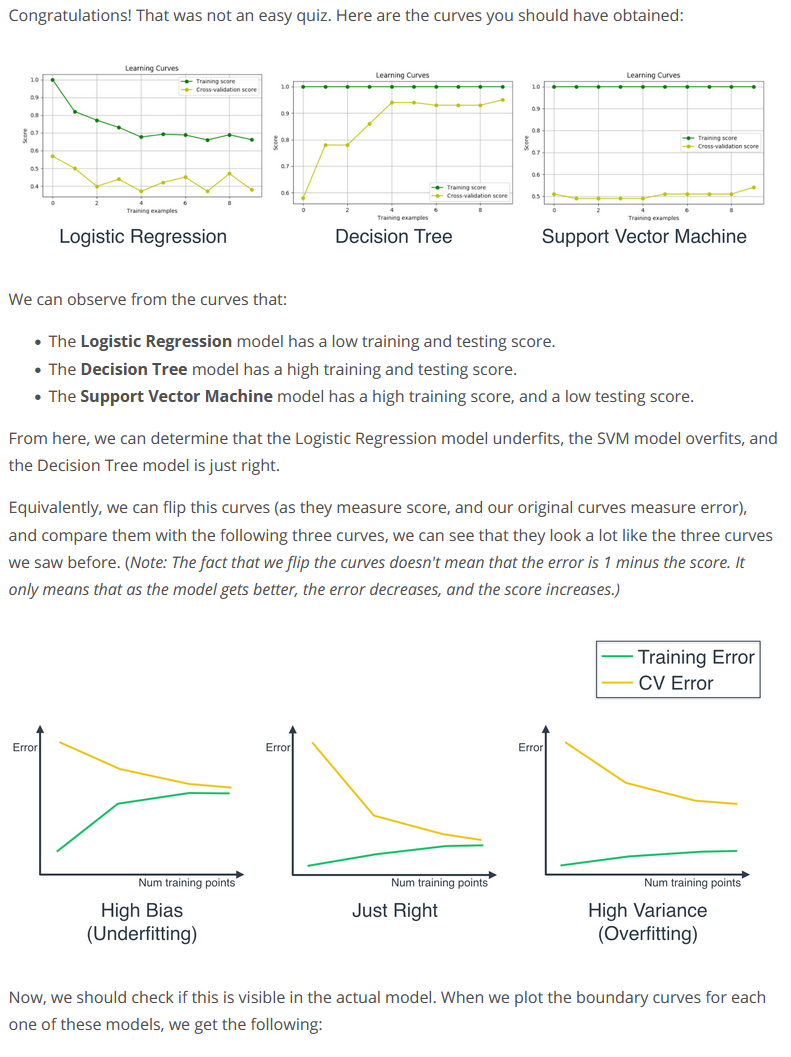
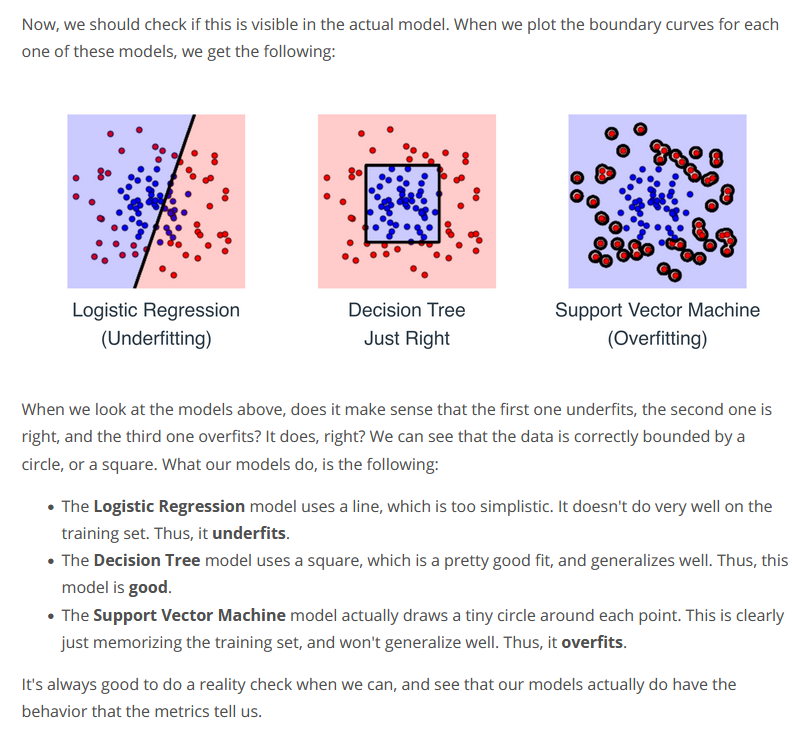

In [ ]:
## 20. Detecting Overfitting and Underfitting with Learning Curves

# Import, read, and split data
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
data = pd.read_csv('data/c2-m7-l17-c20.csv')
import numpy as np
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

### Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# TODO: Uncomment one of the three classifiers, and hit "Test Run"
# to see the learning curve. Use these to answer the quiz below.

### Logistic Regression
estimator = LogisticRegression()

### Decision Tree
#estimator = GradientBoostingClassifier()

### Support Vector Machine
#estimator = SVC(kernel='rbf', gamma=1000)